## Nama: Nashiratun Nissa
## NIM: 11160940000027

### Berikut adalah data set kejahatan yang terjadi di San Fracisco yang terjadi dalam kurun waktu satu tahun

In [2]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

plt.style.use('bmh'); sns.set()

In [3]:
#menyimpan data
crime = pd.read_csv('E:/crimes.csv')

In [4]:
#menampilkan 5 data pertama
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Keterangan variabel-variabel pada dataset di atas:
1. IncidntNum: Nomer Inseden
2. Category: Kategori kejahatan
3. Descript: Deskripsi kejahatannya
4. DayOfWeek: Hari pada saat kejahatan terjadi
5. Date:tanggal, bulan, dan tahun waktu terjadinya kejahatan
6. Time :waktu kejadian kejahatan terjadi
7. PdDistrict:Lokasi kejahatan
8. Resolution: Jenis Hukuman yang diberikan untuk menyelesaikan kasus ini
9. Adress:Alamat di mana terjadinya tindak kejahatan
10. X: lintang lokasi kejahatan
11. y: Garis bujur lokasi kejahatan
12. Location:Nama lokasi yang tepat pada kejadian
13. PdId: Id Pd

In [5]:
#menampilkan 5 data terbawah
crime.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374
150499,179002868,OTHER OFFENSES,"FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...",Friday,12/02/2016 12:00:00 AM,14:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",17900286809024


### Data Warling & Preprocessing

In [6]:
#mencek type data
crime.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

output di atas memberikan informasi tentang type data yang ada pada data set yang kita miliki

In [7]:
#mengecekt missing value
crime.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

Informasi yang dapat kita ambil dari output di atas adalah terdapat satu baris yang tidak terisi pada kolom PdDistrict. Informasi yang dapat kita ambil pula yaitu  missing value yang terdapat pada data set kita tidak akan berpengaruh.

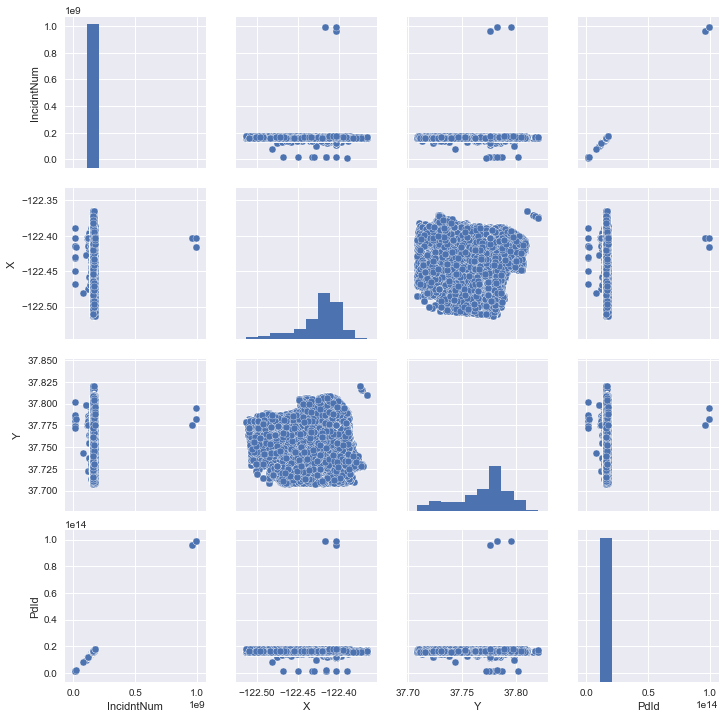

In [8]:
#mengecek outlier
sns.pairplot(crime)

## Analisa EDA

### Basic Statistik

In [9]:
crime.describe(include='all')

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
count,1.505000e+05,150500,150500,150500,150500,150500,150499,150500,150500,150500.000000,150500.000000,150500,1.505000e+05
unique,NaN,39,726,7,366,1439,10,14,16130,NaN,NaN,19386,NaN
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2016 12:00:00 AM,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,"(37.775420706711, -122.403404791479)",NaN
freq,NaN,40409,17741,23371,558,3842,28445,107780,3561,NaN,NaN,3536,NaN
mean,1.616440e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.423599,37.768921,NaN,1.616440e+13
std,5.535976e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026210,0.023637,NaN,5.535976e+11
min,1.135121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707922,NaN,1.135121e+12
25%,1.603283e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.434036,37.756486,NaN,1.603283e+13
50%,1.606541e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416903,37.775421,NaN,1.606541e+13
75%,1.609764e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406605,37.785063,NaN,1.609764e+13


### Visualisasi sederhana dari data set yang miliki

##### Apakah hari mempengaruhi dalam terjadinya tindak kejahatan?

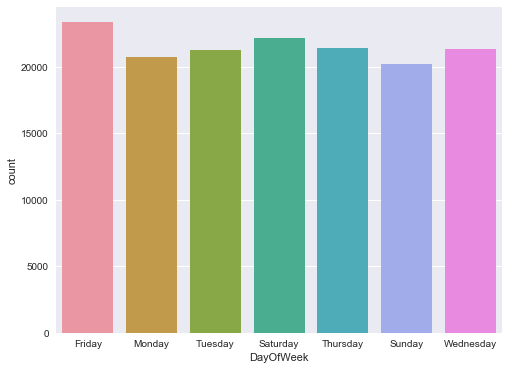

In [10]:
plt.figure(figsize=(8,6))
p = sns.countplot(x='DayOfWeek', data=crime)

Bedasarkan out di atas terlihat bahwa tidak ada hari tertentu dalam terjadinya tindak kejahatan. Namun pada hari Jumat terlihat tindak kejahatan lebih dominan diantara hari-hari lain.

##### Melihat berapa jumlah kejahatan pencurian yang terjadi pada Hari Jumat, 08 Januari 2016

In [11]:
crime.loc[(crime.Category=="LARCENY/THEFT")&(crime.DayOfWeek=="Friday")&(crime.Date=="01/08/2016 12:00:00 AM")]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
177,160020532,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/08/2016 12:00:00 AM,07:30,MISSION,NONE,9TH ST / DIVISION ST,-122.405942,37.769660,"(37.7696597423213, -122.405942290896)",16002053206244
185,160021336,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Friday,01/08/2016 12:00:00 AM,16:26,SOUTHERN,NONE,800 Block of MARKET ST,-122.406691,37.785207,"(37.7852071918419, -122.406690592261)",16002133606301
202,160022118,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Friday,01/08/2016 12:00:00 AM,17:30,CENTRAL,"ARREST, BOOKED",300 Block of POST ST,-122.407613,37.788449,"(37.7884486019705, -122.407612885387)",16002211806363
204,160022180,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/08/2016 12:00:00 AM,21:15,SOUTHERN,NONE,2ND ST / BRYANT ST,-122.393623,37.783079,"(37.7830791191471, -122.393622739343)",16002218006244
215,160022390,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/08/2016 12:00:00 AM,22:45,NORTHERN,NONE,FILBERT ST / FILLMORE ST,-122.435680,37.798021,"(37.7980205895825, -122.435679786498)",16002239006244
242,160026126,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Friday,01/08/2016 12:00:00 AM,18:16,SOUTHERN,NONE,1100 Block of FOLSOM ST,-122.409282,37.775686,"(37.7756858832791, -122.409282266623)",16002612606303
254,160026568,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Friday,01/08/2016 12:00:00 AM,19:30,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",16002656806241
264,160026728,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Friday,01/08/2016 12:00:00 AM,01:00,MISSION,NONE,1100 Block of TREAT AV,-122.412846,37.751759,"(37.7517592755797, -122.412846392511)",16002672806303
758,160053000,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Friday,01/08/2016 12:00:00 AM,08:15,BAYVIEW,NONE,3RD ST / REVERE AV,-122.391523,37.732432,"(37.7324323864471, -122.391522893042)",16005300006224
797,160019654,LARCENY/THEFT,GRAND THEFT FROM PERSON,Friday,01/08/2016 12:00:00 AM,05:40,INGLESIDE,NONE,5300 Block of MISSION ST,-122.442957,37.714206,"(37.7142059812826, -122.442957459548)",16001965406152


Bedasarkan output di atas, didapat informasi bahwa pada Hari Jumat, Tanggal 08 Januari  2016 telah terjadi 131 kasus kejahatan pencurian

##### menampilkan 5 top kategory kejahatan

Text(0.5,1,'5 Category Kejahatan yang Terjadi di san Fracisco')

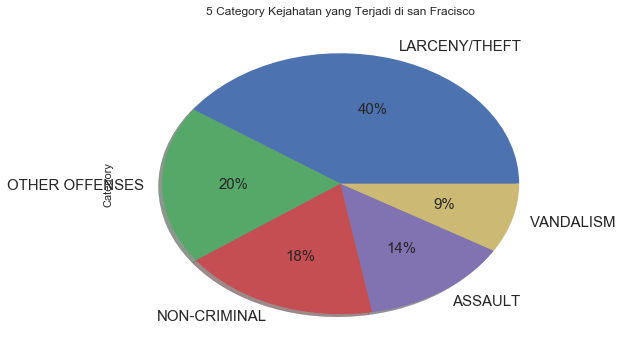

In [12]:
Category_ten=crime.groupby(crime['Category'])['Category'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,6))
plt.subplot()
Category_ten.plot.pie(autopct='%1.f%%', shadow=True, fontsize=15)
plt.title("5 Category Kejahatan yang Terjadi di san Fracisco")

Dapat dilihat bahwa 5 kategory kejahatan yang terjadi di San Fracisco dalam waktu setahun adalah
larceny/theft, other offenses, non-crimal, assault, dan vandalism. 
Dan kejahatan larceny(pencurian) merupakan tindak kejahatan yng banyak terjadi di San Frasisco dalam kurung waktu satu tahun yaitu sebanyak 40%

##### Apakah terdapat daerah tertentu yang mempengaruhi terjadinya kejahatan?

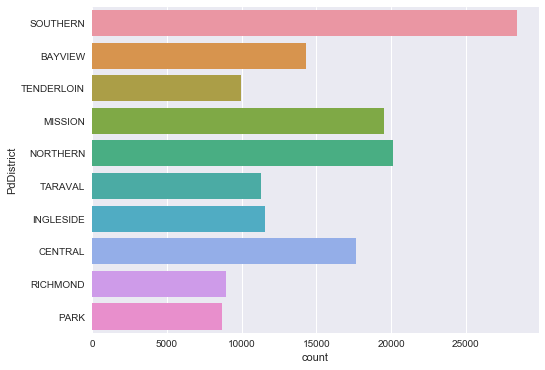

In [13]:
plt.figure(figsize=(8,6))
p = sns.countplot(y='PdDistrict', data=crime)

Hasil output di atas memberikan informasi bahwa daerah southern merupakan tempat paling banyak dalam terjadinya kejahatan.

##### 5 tempat kejahatan yang terjadi di San Fracisco

Text(0.5,1,'5 tempat Kejahatan yang Terjadi di San Fracisco')

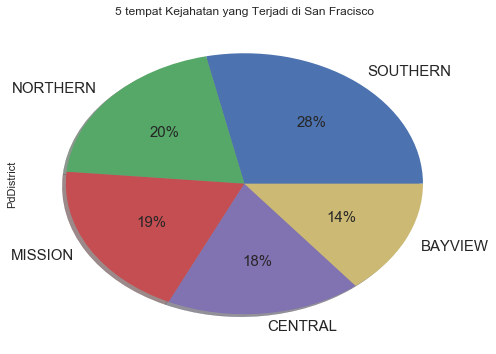

In [14]:
Category_ten=crime.groupby(crime['PdDistrict'])['PdDistrict'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,6))
plt.subplot()
Category_ten.plot.pie(autopct='%1.f%%', shadow=True, fontsize=15)
plt.title("5 tempat Kejahatan yang Terjadi di San Fracisco")

##### Apakah Malam tahun baru rawan terjadi kejahatan?

In [15]:
crime.loc[(crime.Date=="12/31/2016 12:00:00 AM")]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
12064,161062014,ASSAULT,INFLICT INJURY ON COHABITEE,Saturday,12/31/2016 12:00:00 AM,09:57,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.409504,37.781526,"(37.781526271747, -122.40950430935)",16106201415040
13585,161062086,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Saturday,12/31/2016 12:00:00 AM,10:20,SOUTHERN,"ARREST, BOOKED",7TH ST / MARKET ST,-122.412515,37.780478,"(37.7804777480508, -122.412515341356)",16106208665010
13586,161062086,OTHER OFFENSES,TRAFFIC VIOLATION,Saturday,12/31/2016 12:00:00 AM,10:20,SOUTHERN,"ARREST, BOOKED",7TH ST / MARKET ST,-122.412515,37.780478,"(37.7804777480508, -122.412515341356)",16106208665015
19115,170000182,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Saturday,12/31/2016 12:00:00 AM,23:45,SOUTHERN,NONE,1000 Block of HARRISON ST,-122.404440,37.777058,"(37.7770583079983, -122.404439703838)",17000018264085
19116,170000198,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF DRUGS,Saturday,12/31/2016 12:00:00 AM,23:58,MISSION,"ARREST, BOOKED",2200 Block of BRYANT ST,-122.409770,37.758817,"(37.7588168712302, -122.409769737777)",17000019865060
28743,176001524,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,12/31/2016 12:00:00 AM,02:00,SOUTHERN,NONE,500 Block of HOWARD ST,-122.397032,37.787825,"(37.7878246694374, -122.397032436528)",17600152406372
28749,176003605,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,12/31/2016 12:00:00 AM,17:00,CENTRAL,NONE,2600 Block of JONES ST,-122.416916,37.805694,"(37.805694248558, -122.41691595708)",17600360528150
101632,161061561,TRESPASS,TRESPASSING,Saturday,12/31/2016 12:00:00 AM,01:57,TARAVAL,"ARREST, BOOKED",700 Block of HOLLOWAY AV,-122.460743,37.721888,"(37.7218878673726, -122.460743393033)",16106156127195
111416,161061345,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Saturday,12/31/2016 12:00:00 AM,00:15,NORTHERN,"ARREST, BOOKED",VANNESS AV / SACRAMENTO ST,-122.422517,37.791289,"(37.7912889898479, -122.422516966616)",16106134565010
111417,161061345,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Saturday,12/31/2016 12:00:00 AM,00:15,NORTHERN,"ARREST, BOOKED",VANNESS AV / SACRAMENTO ST,-122.422517,37.791289,"(37.7912889898479, -122.422516966616)",16106134565016


Bedasarkan outopt di atas terlihat bahwa telah terjadi 478 kasus kejahatan pada malam menuju pergantian tahun.

##### 5 tanggal teratas dengan jumlah kejahatan terbanyak

Text(0.5,1,'5 tempat Kejahatan yang Terjadi di San Fracisco')

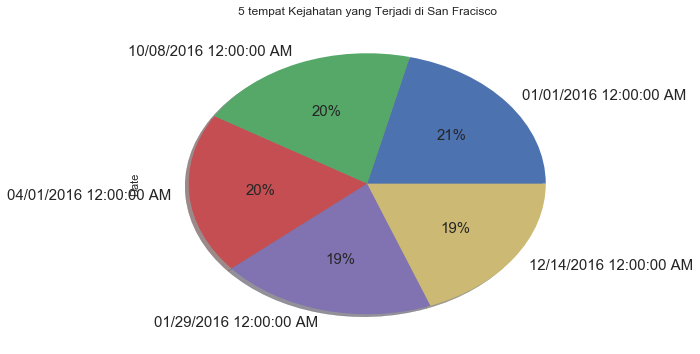

In [16]:
Category_ten=crime.groupby(crime['Date'])['Date'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,6))
plt.subplot()
Category_ten.plot.pie(autopct='%1.f%%', shadow=True, fontsize=15)
plt.title("5 tempat Kejahatan yang Terjadi di San Fracisco")

5 tanggal yang sering terjadi tindak kejahatan:
1. tanggal 08 Oktober 2016 sebanyak 20% kejahatan
2. tanggal 01 April 2016 sebnayak 20 % kejahatan
3. tanggal 29 Januari 2016 sebanyak 19% kejahatan
4. tanggal 14 Desember 2016 sebanyak 19% kejahatan
5. tanggal 01 januari 2016 sebanyak 21% kejahatan

maka dapat disimpulkan bahawa pada awal tahun rawan terjadi kasus kejahatan